In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lblock=2048
nblock=512
ntap=4
npfb=nblock-ntap+1

In [26]:
def zero_padding(w2d,n_zeros=1024):
    pad = np.zeros((len(w2d),n_zeros))
    return np.concatenate([w2d,pad],axis=1)

In [3]:
N=ntap*lblock
w=np.arange(0,N)-N/2
w2=np.sinc(w/lblock)
w=np.sinc(np.arange(-ntap/2,ntap/2,1/lblock)) 

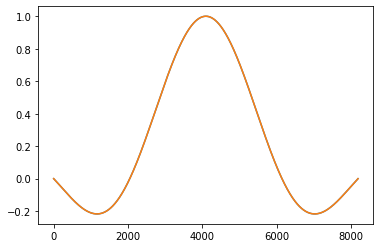

In [5]:
plt.plot(w)
plt.plot(w2)

In [44]:
wnew = np.reshape(w, (ntap,N//ntap)).T

In [45]:
wnew_padded = zero_padding(wnew)

In [46]:
x=np.zeros((1024,lblock))

In [23]:
x.shape

(1024, 2048)

In [57]:
x[:ntap,:]=w.reshape(ntap,-1)

In [59]:
xf=np.fft.rfft(x,axis=0)
# xf=np.fft.rfft(wnew_padded,axis=1)

In [60]:
xf_abs = np.abs(xf)

In [61]:
xf_abs.shape

(513, 2048)

In [58]:
x

array([[-3.89817183e-17, -2.44200148e-04, -4.88519019e-04, ...,
        -1.46269596e-03, -9.75608226e-04, -4.88042756e-04],
       [ 3.89817183e-17,  4.88519593e-04,  9.77515573e-04, ...,
         9.99996470e-01,  9.99998431e-01,  9.99999608e-01],
       [ 1.00000000e+00,  9.99999608e-01,  9.99998431e-01, ...,
         1.46698749e-03,  9.77515573e-04,  4.88519593e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

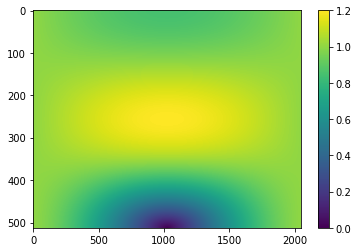

In [63]:
plt.imshow(xf_abs,aspect='auto')
plt.colorbar()

zeros will always occur near to 512 (n/2 of the zero padded array cuz multiple of pi phase diff required), but for it to be actually zero w[0]=w[3N] and w[N]=w[2N]. so zeros will also always occur near N/2 ~ 1024, where chunks of sinc are symmetric.

In [64]:
xf_abs.shape

(257, 2048)

In [24]:
len(x)

1024

In [38]:
xf_abs

array([[2.02311233, 2.02309046, 2.02302486, ..., 0.07881396, 0.07876357,
        0.07874677],
       [2.02312463, 2.02310276, 2.02303716, ..., 0.07882596, 0.07877568,
        0.07875891],
       [2.02313687, 2.02311501, 2.02304941, ..., 0.07883773, 0.07878755,
        0.07877082],
       ...,
       [2.02314924, 2.02312737, 2.02306177, ..., 0.07884996, 0.0787998 ,
        0.07878307],
       [2.02313702, 2.02311515, 2.02304955, ..., 0.07883826, 0.078788  ,
        0.07877124],
       [2.02312475, 2.02310288, 2.02303728, ..., 0.07882633, 0.07877596,
        0.07875917]])